In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

path = "./res/credit card fraud detection/creditcard.csv"
df = pd.read_csv(path)
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [2]:
from sklearn.model_selection import train_test_split

def get_preprocessed_df(df=None):
    """
    input
    df : before preprocessing

    output
    res : after dropping time columns
    """
    res = df.copy()
    res.drop("Time", axis=1, inplace=True)
    return res

In [3]:
def get_train_test_datasets(df=None):
    df_copy = get_preprocessed_df(df)
    X_features = df_copy.iloc[:,:-1]
    y_target= df_copy.iloc[:,-1]
    
    X_train, X_test, y_train, y_test = train_test_split(X_features, y_target,
                                                       test_size=0.2,
                                                       stratify=y_target,
                                                       random_state=100)
    return X_train, X_test, y_train, y_test

In [4]:
X_train, X_test, y_train, y_test = get_train_test_datasets(df)

In [5]:
from sklearn.linear_model import LogisticRegression
from utils.common import show_metrics

In [6]:
lr = LogisticRegression()
lr.fit(X_train, y_train)
y_pred = lr.predict(X_test)

In [7]:
show_metrics(y_test, y_pred)

[[56854    10]
 [   38    60]]
Acc : 0.9991573329588147
precision : 0.8571428571428571
recall : 0.6122448979591837
f1 score : 0.7142857142857143
roc auc : 0.8060345198856133


In [8]:
def get_model_train_eval(model, ftr_train=None, ftr_test=None,
                        tgt_train=None, tgt_test=None):
    model.fit(ftr_train, tgt_train)
    y_pred = model.predict(ftr_test)
    show_metrics(y_test, y_pred)
    return model

In [9]:
from lightgbm import LGBMClassifier

lgbm = LGBMClassifier(n_estimators=1000, num_leaves=32,
                       n_jobs=-1, boost_from_average=False)
lgbm = get_model_train_eval(lgbm, ftr_train=X_train, ftr_test=X_test,
                    tgt_train=y_train, tgt_test = y_test)

[[56863     1]
 [   22    76]]
Acc : 0.9995962220427653
precision : 0.987012987012987
recall : 0.7755102040816326
f1 score : 0.8685714285714285
roc auc : 0.8877463091314184


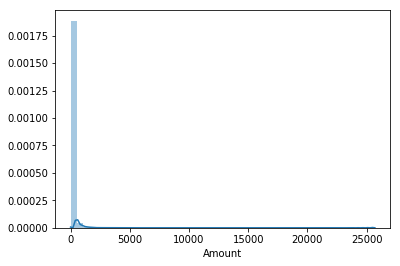

In [10]:
sns.distplot(df["Amount"])

In [11]:
from sklearn.preprocessing import StandardScaler

def get_preprocessed_df(df=None):
    res = df.copy()
    scaler = StandardScaler()
    #res["Amount_Scaled"] = scaler.fit_transform(df["Amount"].values.reshape(-1,1))
    amount_scaled = scaler.fit_transform(df["Amount"].values.reshape(-1,1))
    res.insert(0, "Amount_Scaled", amount_scaled)
    res.drop(["Time","Amount"], axis=1, inplace=True)
    return res

In [12]:
X_train, X_test, y_train, y_test = get_train_test_datasets(df)
lr = LogisticRegression()
print("logistic regression classification evaluation")
get_model_train_eval(model=lr, ftr_train=X_train, ftr_test=X_test,
                    tgt_train=y_train, tgt_test=y_test)

lgbm = LGBMClassifier(n_estimators=1000, num_leaves=64,
                      n_jobs=-1,boost_from_average=False)
print("\nLGBM classification evaluation")
get_model_train_eval(model=lgbm, ftr_train=X_train, ftr_test=X_test,
                    tgt_train=y_train, tgt_test=y_test)

logistic regression classification evaluation
[[56855     9]
 [   42    56]]
Acc : 0.9991046662687406
precision : 0.8615384615384616
recall : 0.5714285714285714
f1 score : 0.6871165644171779
roc auc : 0.7856351495297049

LGBM classification evaluation
[[56862     2]
 [   20    78]]
Acc : 0.9996137776061234
precision : 0.975
recall : 0.7959183673469388
f1 score : 0.8764044943820225
roc auc : 0.8979415978546735


LGBMClassifier(boost_from_average=False, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, importance_type='split',
               learning_rate=0.1, max_depth=-1, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=1000,
               n_jobs=-1, num_leaves=64, objective=None, random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [13]:
def get_preprocessed_df(df=None):
    res = df.copy()
    amount_scaled = np.log1p(res["Amount"])
    res.insert(0, "Amount_Scaled", amount_scaled)
    res.drop(["Time","Amount"], axis=1, inplace=True)
    return res

In [14]:
X_train, X_test, y_train, y_test = get_train_test_datasets(df)
lr = LogisticRegression()
print("logistic regression classification evaluation")
get_model_train_eval(model=lr, ftr_train=X_train, ftr_test=X_test,
                    tgt_train=y_train, tgt_test=y_test)

lgbm = LGBMClassifier(n_estimators=1000, num_leaves=64,
                      n_jobs=-1, boost_from_average=False)
print("\nLGBM classification evaluation")
get_model_train_eval(model=lgbm, ftr_train=X_train, ftr_test=X_test,
                    tgt_train=y_train, tgt_test=y_test)

logistic regression classification evaluation
[[56855     9]
 [   42    56]]
Acc : 0.9991046662687406
precision : 0.8615384615384616
recall : 0.5714285714285714
f1 score : 0.6871165644171779
roc auc : 0.7856351495297049

LGBM classification evaluation
[[56862     2]
 [   22    76]]
Acc : 0.9995786664794073
precision : 0.9743589743589743
recall : 0.7755102040816326
f1 score : 0.8636363636363635
roc auc : 0.8877375162220206


LGBMClassifier(boost_from_average=False, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, importance_type='split',
               learning_rate=0.1, max_depth=-1, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=1000,
               n_jobs=-1, num_leaves=64, objective=None, random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

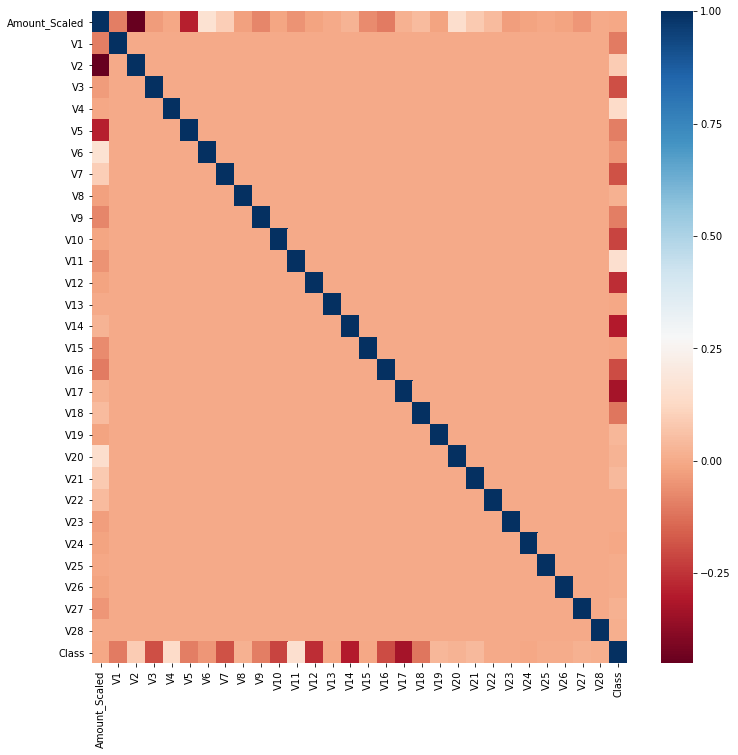

In [15]:
card_df = get_preprocessed_df(df)
plt.figure(figsize=(12,12))
corr = card_df.corr()
sns.heatmap(corr, cmap="RdBu")

In [16]:
def get_outlier(df=None, column=None, weight=1.5):
    fraud = df[df["Class"] == 1][column]
    quatile_25 = np.percentile(fraud.values, 25)
    quatile_75 = np.percentile(fraud.values, 75)
    
    iqr = quatile_75 - quatile_25
    iqr_weight = iqr * weight
    lowest_val = quatile_25 - iqr_weight
    highest_val = quatile_75 + iqr_weight
    outlier_idx = fraud[(fraud < lowest_val) | (fraud > highest_val)].index
    return outlier_idx

In [17]:
outlier_idx = get_outlier(df=card_df, column="V14", weight=1.5)
outlier_idx

Int64Index([8296, 8615, 9035, 9252], dtype='int64')

In [18]:
def get_preprocessed_df(df=None):
    res = df.copy()
    amount_scaled = np.log1p(res["Amount"])
    res.insert(0, "Amount_Scaled", amount_scaled)
    res.drop(["Time","Amount"], axis=1, inplace=True)
    
    outlier_index = get_outlier(df=res, column = "V14", weight=1.5)
    res.drop(outlier_index, axis=0, inplace=True)
    return res

In [19]:
X_train, X_test, y_train, y_test = get_train_test_datasets(df)
lr = LogisticRegression()
print("logistic regression classification evaluation")
get_model_train_eval(model=lr, ftr_train=X_train, ftr_test=X_test,
                    tgt_train=y_train, tgt_test=y_test)

lgbm = LGBMClassifier(n_estimators=1000, num_leaves=64,
                      n_jobs=-1, boost_from_average=False)
print("\nLGBM classification evaluation")
get_model_train_eval(model=lgbm, ftr_train=X_train, ftr_test=X_test,
                    tgt_train=y_train, tgt_test=y_test)

logistic regression classification evaluation
[[56853    10]
 [   49    49]]
Acc : 0.9989642035778866
precision : 0.8305084745762712
recall : 0.5
f1 score : 0.6242038216560509
roc auc : 0.7499120693596891

LGBM classification evaluation
[[56860     3]
 [   20    78]]
Acc : 0.9995962149540913
precision : 0.9629629629629629
recall : 0.7959183673469388
f1 score : 0.871508379888268
roc auc : 0.8979328044813761


LGBMClassifier(boost_from_average=False, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, importance_type='split',
               learning_rate=0.1, max_depth=-1, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=1000,
               n_jobs=-1, num_leaves=64, objective=None, random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)

In [25]:
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=100)
X_train_over, y_train_over = smote.fit_sample(X_train, y_train)
print("berfore smote : ",X_train.shape, y_train.shape)
print("after smote : ", X_train_over.shape, y_train_over.shape)
print("label distribution after smote \n", pd.Series(y_train_over).value_counts())

berfore smote :  (227842, 29) (227842,)
after smote :  (454904, 29) (454904,)
label distribution after smote 
 1    227452
0    227452
Name: Class, dtype: int64


In [26]:
lr = LogisticRegression()
print("logistic regression classification evaluation")
get_model_train_eval(model=lr, ftr_train=X_train_over, ftr_test=X_test,
                    tgt_train=y_train_over, tgt_test=y_test)

lgbm = LGBMClassifier(n_estimators=1000, num_leaves=64,
                      n_jobs=-1, boost_from_average=False)
print("\nLGBM classification evaluation")
get_model_train_eval(model=lgbm, ftr_train=X_train_over, ftr_test=X_test,
                    tgt_train=y_train_over, tgt_test=y_test)

logistic regression classification evaluation
[[55510  1353]
 [   12    86]]
Acc : 0.9760362353189024
precision : 0.059763724808895066
recall : 0.8775510204081632
f1 score : 0.11190631099544567
roc auc : 0.9268784945700137

LGBM classification evaluation
[[56850    13]
 [   21    77]]
Acc : 0.9994031003669177
precision : 0.8555555555555555
recall : 0.7857142857142857
f1 score : 0.8191489361702127
roc auc : 0.8927428330247387


LGBMClassifier(boost_from_average=False, boosting_type='gbdt',
               class_weight=None, colsample_bytree=1.0, importance_type='split',
               learning_rate=0.1, max_depth=-1, min_child_samples=20,
               min_child_weight=0.001, min_split_gain=0.0, n_estimators=1000,
               n_jobs=-1, num_leaves=64, objective=None, random_state=None,
               reg_alpha=0.0, reg_lambda=0.0, silent=True, subsample=1.0,
               subsample_for_bin=200000, subsample_freq=0)